# Portfolio Pal - Stock Market Analysis 

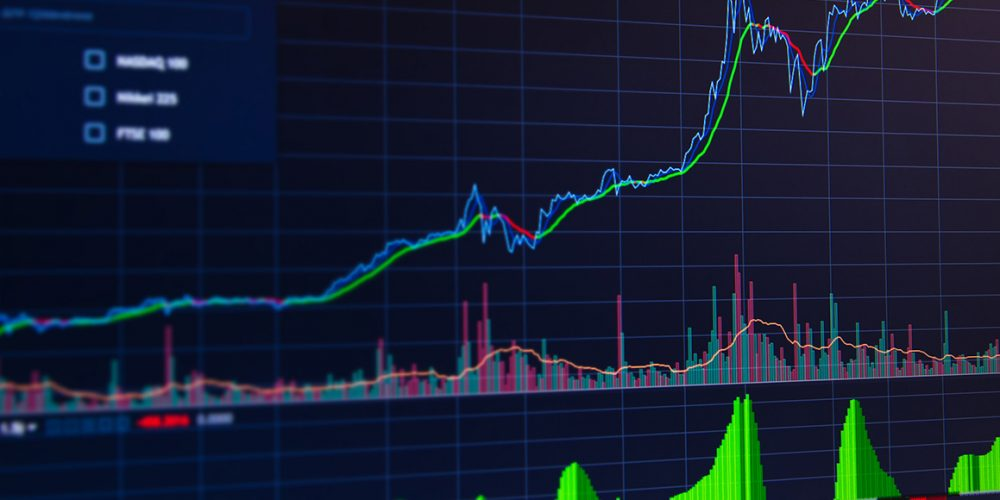

In this project we will be looking at data collected from the Dow Jones Industrial Average to make predictions using Machine Learning algorithms. The Pandas DataReader is utilized to get stock information from Yahoo Financial and I have provided methods to help visualize different aspects of this data. The goal of this project is not to automatically trade stocks for an investor, but instead to help investors analyze and interpret the risks associated with investing in a particular stock. Through the process of data visualization and exploratory analysis this project aims to equip investors with as much information as possible to help them determine what position they should take on a particular stock that is listed in the Dow 30 index. To help aid investors, we will attempt to utilize the fields of Reinforcement Learning to train a Deep Q Network (DQN) to help determine the best times to buy, sell or hold up to 3 stocks.

We will begin by analyzing the following aspects of the data:

    1.) Visualize different periods of selected stocks price change over time
    2.) Calculate daily return of the stock on average
    3.) Visualize the moving average of the various stocks
    4.) Determine the correlation between different stocks by performing exploratory analysis
    5.) Visualize the risk vs expected return for investing in a particular stock
    6.) Attempt to predict stock prices using Deep Reinforcement Learning
    7.) Perform Backtesting with Pyfolio to determine the performance of our ML agents
   

# 1. Determine the change of a stock's price over time

In this section we'll begin by loading in our data and go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock. If there is no stock data in the current repository begin by running the generate_stock_data.py file.

In [23]:
# Here we have all of our basic imports for our exploratory analysis
import warnings
warnings.filterwarnings('ignore')
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fast")

# inline sets matplotlib to output graphs in Jupyter Notebook
%matplotlib inline 

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime, timedelta

In [3]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from finrl.config import config

# For time stamps
from datetime import datetime, timedelta

import os
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

#Populate the stock index with the stocks you're interested in
stock_data = {}
YEARS_FROM_PRESENT = 10
stock_index = config.DOW_30_TICKER

# Set up End and Start times for data grab
# We don't want today, because the closing price isn't final yet
end = datetime.now() - timedelta(days=1)
start = datetime(end.year - YEARS_FROM_PRESENT, end.month, end.day)

#For loop for grabing yahoo finance data and setting it as a dataframe. 
for ticker in stock_index:   
    try:
        print(f"Downloading {ticker} stock data...")
        stock_data[ticker] = DataReader(ticker, 'yahoo', start, end)
        stock_data[ticker]['Ticker'] = ticker
    except:
        print(f"Unable to get data for {ticker} ticker.")

Now that we have loaded in all the data up to yesterdays closing numbers, we can begin visualizing some of the data we've collected. For example we can show what the dataframe looks like for a particular stock.

In [24]:
example = ''
print(f"Current Index:{stock_index}")
while example not in stock_index:
    example = input("Enter a stock ticker:") 

Current Index:['AAPL', 'MSFT', 'JPM', 'V', 'RTX', 'PG', 'GS', 'NKE', 'DIS', 'AXP', 'HD', 'INTC', 'WMT', 'IBM', 'MRK', 'UNH', 'KO', 'CAT', 'TRV', 'JNJ', 'CVX', 'MCD', 'VZ', 'CSCO', 'XOM', 'BA', 'MMM', 'PFE', 'WBA', 'DD']
Enter a stock ticker:AAPL


In [25]:
stock_data[example]

High         Low        Open       Close       Volume  \
Date                                                                      
2011-05-02   12.516786   12.339286   12.490714   12.367143  442713600.0   
2011-05-03   12.496071   12.343571   12.428214   12.435714  313348000.0   
2011-05-04   12.565357   12.388571   12.437857   12.484643  389250400.0   
2011-05-05   12.533929   12.358929   12.442857   12.383929  335969200.0   
2011-05-06   12.500000   12.364643   12.488929   12.380714  280134400.0   
...                ...         ...         ...         ...          ...   
2021-04-26  135.059998  133.559998  134.830002  134.720001   66905100.0   
2021-04-27  135.410004  134.110001  135.009995  134.389999   66015800.0   
2021-04-28  135.020004  133.080002  134.309998  133.580002  107760100.0   
2021-04-29  137.070007  132.449997  136.470001  133.479996  151101000.0   
2021-04-30  133.559998  131.070007  131.779999  131.460007  109713200.0   

             Adj Close Ticker  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                            
2011-05-02   10.652606   AAPL             NaN             NaN             NaN   
2011-05-03   10.711670   AAPL             NaN             NaN             NaN   
2011-05-04   10.753815   AAPL             NaN             NaN             NaN   
2011-05-05   10.667065   AAPL             NaN             NaN             NaN   
2011-05-06   10.664294   AAPL             NaN             NaN             NaN   
...                ...    ...             ...             ...             ...   
2021-04-26  134.720001   AAPL      133.755000      129.930001        126.3328   
2021-04-27  134.389999   AAPL      133.751001      130.580001        126.3132   
2021-04-28  133.580002   AAPL      133.906001      131.264001        126.3210   
2021-04-29  133.479996   AAPL      133.804001      131.830500        126.3738   
2021-04-30  131.460007   AAPL      133.534001      132.253501        126.4088   

            Daily Return  
Date                      
2011-05-02           NaN  
2011-05-03      0.005545  
2011-05-04      0.003934  
2011-05-05     -0.008067  
2011-05-06     -0.000260  
...                  ...  
2021-04-26      0.002978  
2021-04-27     -0.002450  
2021-04-28     -0.006027  
2021-04-29     -0.000749  
2021-04-30     -0.015133  

[2517 rows x 11 columns]

In [26]:
stock_data[example].describe()

High          Low         Open        Close        Volume  \
count  2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean     40.449025    39.601759    40.030136    40.040021  2.425626e+08   
std      29.507866    28.704196    29.129265    29.120737  1.920040e+08   
min      11.346429    11.089286    11.310000    11.261429  4.544800e+07   
25%      21.042856    20.550714    20.840000    20.857143  1.108208e+08   
50%      29.422501    28.937500    29.195000    29.160000  1.730716e+08   
75%      47.372501    46.552502    46.970001    47.037498  3.100692e+08   
max     145.089996   141.369995   143.600006   143.160004  1.506120e+09   

         Adj Close  MA for 10 days  MA for 20 days  MA for 50 days  \
count  2517.000000     2508.000000     2498.000000     2468.000000   
mean     38.346343       38.225560       38.090733       37.726383   
std      29.736556       29.467013       29.164247       28.355962   
min       9.700181       10.002798       10.139478       10.416579   
25%      18.026491       17.993472       18.002439       18.079876   
50%      27.187677       27.086953       27.052460       26.721558   
75%      45.660728       45.566282       45.652671       45.700760   
max     142.946396      137.466585      136.138230      131.870241   

       Daily Return  
count   2516.000000  
mean       0.001163  
std        0.018089  
min       -0.128647  
25%       -0.007132  
50%        0.000887  
75%        0.010389  
max        0.119808

In [27]:
for ticker in stock_index:
    print(f"\n{ticker}")
    stock_data[ticker].info()


AAPL
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2011-05-02 to 2021-04-30
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   High            2517 non-null   float64
 1   Low             2517 non-null   float64
 2   Open            2517 non-null   float64
 3   Close           2517 non-null   float64
 4   Volume          2517 non-null   float64
 5   Adj Close       2517 non-null   float64
 6   Ticker          2517 non-null   object 
 7   MA for 10 days  2508 non-null   float64
 8   MA for 20 days  2498 non-null   float64
 9   MA for 50 days  2468 non-null   float64
 10  Daily Return    2516 non-null   float64
dtypes: float64(10), object(1)
memory usage: 300.5+ KB

MSFT
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2011-05-02 to 2021-04-30
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hig

Now we can get a historical view of the adjusted closing price for a list of stocks for a given date range in the last 10 years. You an also type STOCK_INDEX to get the entire index!

Current Index:['AAPL', 'MSFT', 'JPM', 'V', 'RTX', 'PG', 'GS', 'NKE', 'DIS', 'AXP', 'HD', 'INTC', 'WMT', 'IBM', 'MRK', 'UNH', 'KO', 'CAT', 'TRV', 'JNJ', 'CVX', 'MCD', 'VZ', 'CSCO', 'XOM', 'BA', 'MMM', 'PFE', 'WBA', 'DD']
Enter a list of tickers separated by whitespace:STOCK_INDEX
Date Range: 2011-05-02 00:00:00 - 2021-04-30 00:00:00
Note: Some dates may be unavailable
Enter a valid start date (YYYY-MM-DD):2011-05-02
Enter a valid end date (YYYY-MM-DD):2021-04-30


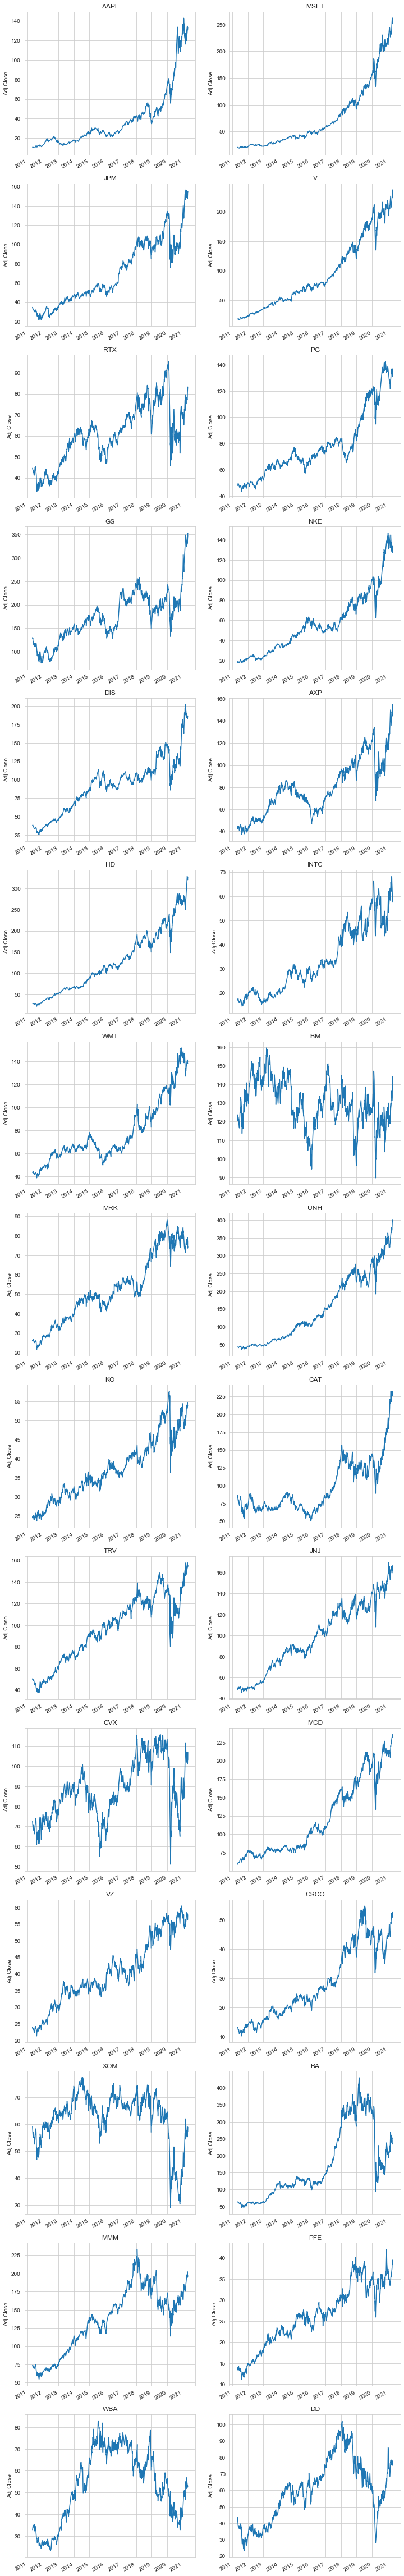

In [30]:
tickers = ['']
valid_input = False
print(f"Current Index:{stock_index}")
while not valid_input:
    valid_input = True
    for ticker in tickers:
        if ticker not in stock_index:
            user_input = input("Enter a list of tickers separated by whitespace:")
            if user_input == "STOCK_INDEX":
                tickers = stock_index
            else:
                valid_input = False
                tickers = user_input.split(' ')
            break

max_index = stock_data[tickers[0]].index.max()
min_index = stock_data[tickers[0]].index.min()
for ticker in tickers:
    index = stock_data[ticker].index.max()
    if max_index < index:
        max_index = index
    index = stock_data[ticker].index.min()
    if min_index > index:
        min_index = index
    
print(f"Date Range: {min_index} - {max_index}")
print("Note: Some dates may be unavailable")

valid_input = False
while not valid_input:
    valid_input = True
    start = input(f"Enter a valid start date (YYYY-MM-DD):")
    if start not in stock_data[tickers[0]].index:
        valid_input = False

valid_input = False

while not valid_input:
    valid_input = True
    end = input(f"Enter a valid end date (YYYY-MM-DD):")
    if end not in stock_data[tickers[0]].index or end < start:
        valid_input = False

nrows = math.ceil(len(tickers)/2)        
plt.figure(figsize=(12, 4 * nrows))
plt.subplots_adjust(top=1.25, bottom=1.2)

target_data = {}

for i, ticker in enumerate(tickers, 1):
    plt.subplot(nrows, 2, i)
    target_data[ticker] = stock_data[ticker][start:end]
    target_data[ticker]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{ticker}")

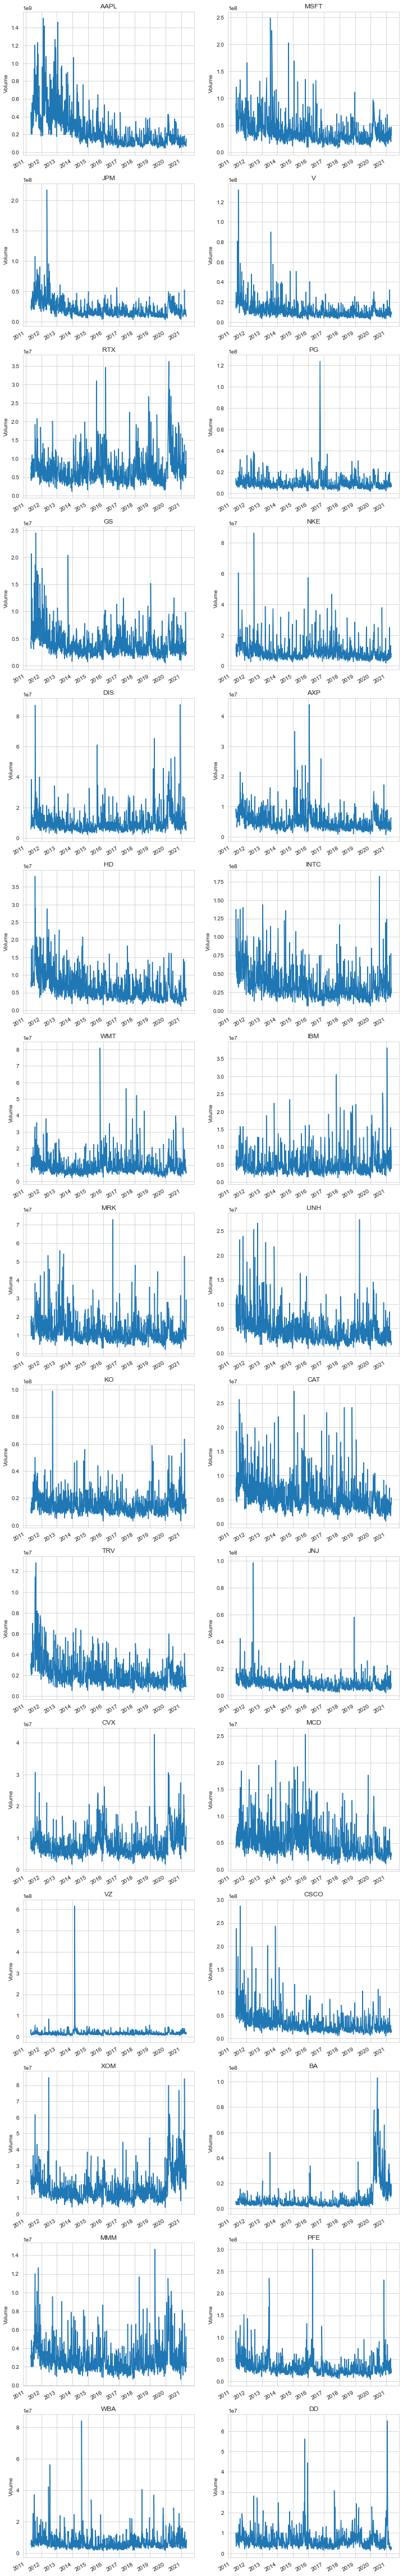

In [31]:
# Plotting the total volume of stock being traded each day for the inputed stocks and date range
plt.figure(figsize=(12, 4 * nrows))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, ticker in enumerate(tickers, 1):
    plt.subplot(nrows, 2, i)
    target_data[ticker]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{ticker}")

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. Calculate and append the moving average for the dataset

In [32]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for ticker in stock_index:
        column_name = f"MA for {ma} days"
        stock_data[ticker][column_name] = stock_data[ticker]['Adj Close'].rolling(ma).mean()
        
target_data = {}

for ticker in tickers:
    target_data[ticker] = stock_data[ticker].loc[start:end]

In [33]:
target_data[tickers[0]]

High         Low        Open       Close       Volume  \
Date                                                                      
2011-05-02   12.516786   12.339286   12.490714   12.367143  442713600.0   
2011-05-03   12.496071   12.343571   12.428214   12.435714  313348000.0   
2011-05-04   12.565357   12.388571   12.437857   12.484643  389250400.0   
2011-05-05   12.533929   12.358929   12.442857   12.383929  335969200.0   
2011-05-06   12.500000   12.364643   12.488929   12.380714  280134400.0   
...                ...         ...         ...         ...          ...   
2021-04-26  135.059998  133.559998  134.830002  134.720001   66905100.0   
2021-04-27  135.410004  134.110001  135.009995  134.389999   66015800.0   
2021-04-28  135.020004  133.080002  134.309998  133.580002  107760100.0   
2021-04-29  137.070007  132.449997  136.470001  133.479996  151101000.0   
2021-04-30  133.559998  131.070007  131.779999  131.460007  109713200.0   

             Adj Close Ticker  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                            
2011-05-02   10.652606   AAPL             NaN             NaN             NaN   
2011-05-03   10.711670   AAPL             NaN             NaN             NaN   
2011-05-04   10.753815   AAPL             NaN             NaN             NaN   
2011-05-05   10.667065   AAPL             NaN             NaN             NaN   
2011-05-06   10.664294   AAPL             NaN             NaN             NaN   
...                ...    ...             ...             ...             ...   
2021-04-26  134.720001   AAPL      133.755000      129.930001        126.3328   
2021-04-27  134.389999   AAPL      133.751001      130.580001        126.3132   
2021-04-28  133.580002   AAPL      133.906001      131.264001        126.3210   
2021-04-29  133.479996   AAPL      133.804001      131.830500        126.3738   
2021-04-30  131.460007   AAPL      133.534001      132.253501        126.4088   

            Daily Return  
Date                      
2011-05-02           NaN  
2011-05-03      0.005545  
2011-05-04      0.003934  
2011-05-05     -0.008067  
2011-05-06     -0.000260  
...                  ...  
2021-04-26      0.002978  
2021-04-27     -0.002450  
2021-04-28     -0.006027  
2021-04-29     -0.000749  
2021-04-30     -0.015133  

[2517 rows x 11 columns]

Now we can view the histograms of daily returns for the tickers from our target dataset.

Stock Index: ['AAPL', 'MSFT', 'JPM', 'V', 'RTX', 'PG', 'GS', 'NKE', 'DIS', 'AXP', 'HD', 'INTC', 'WMT', 'IBM', 'MRK', 'UNH', 'KO', 'CAT', 'TRV', 'JNJ', 'CVX', 'MCD', 'VZ', 'CSCO', 'XOM', 'BA', 'MMM', 'PFE', 'WBA', 'DD']
Enter Stock ticker:asd
Enter Stock ticker:AAPL


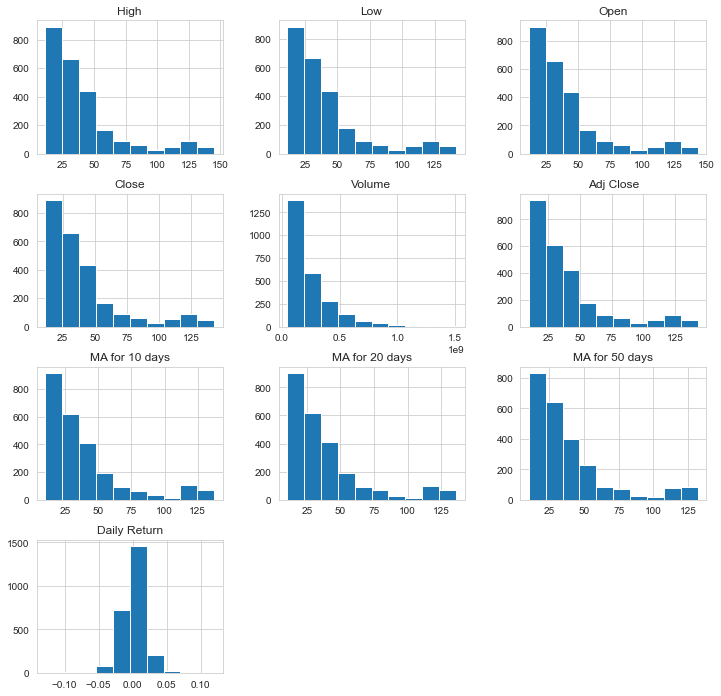

In [35]:
target = ''
keys = list(target_data.keys())
print(f"Stock Index: {stock_index}")
while target not in keys:
    target = input(f"Enter Stock ticker:")

target_data[target].hist(figsize=(12, 12));

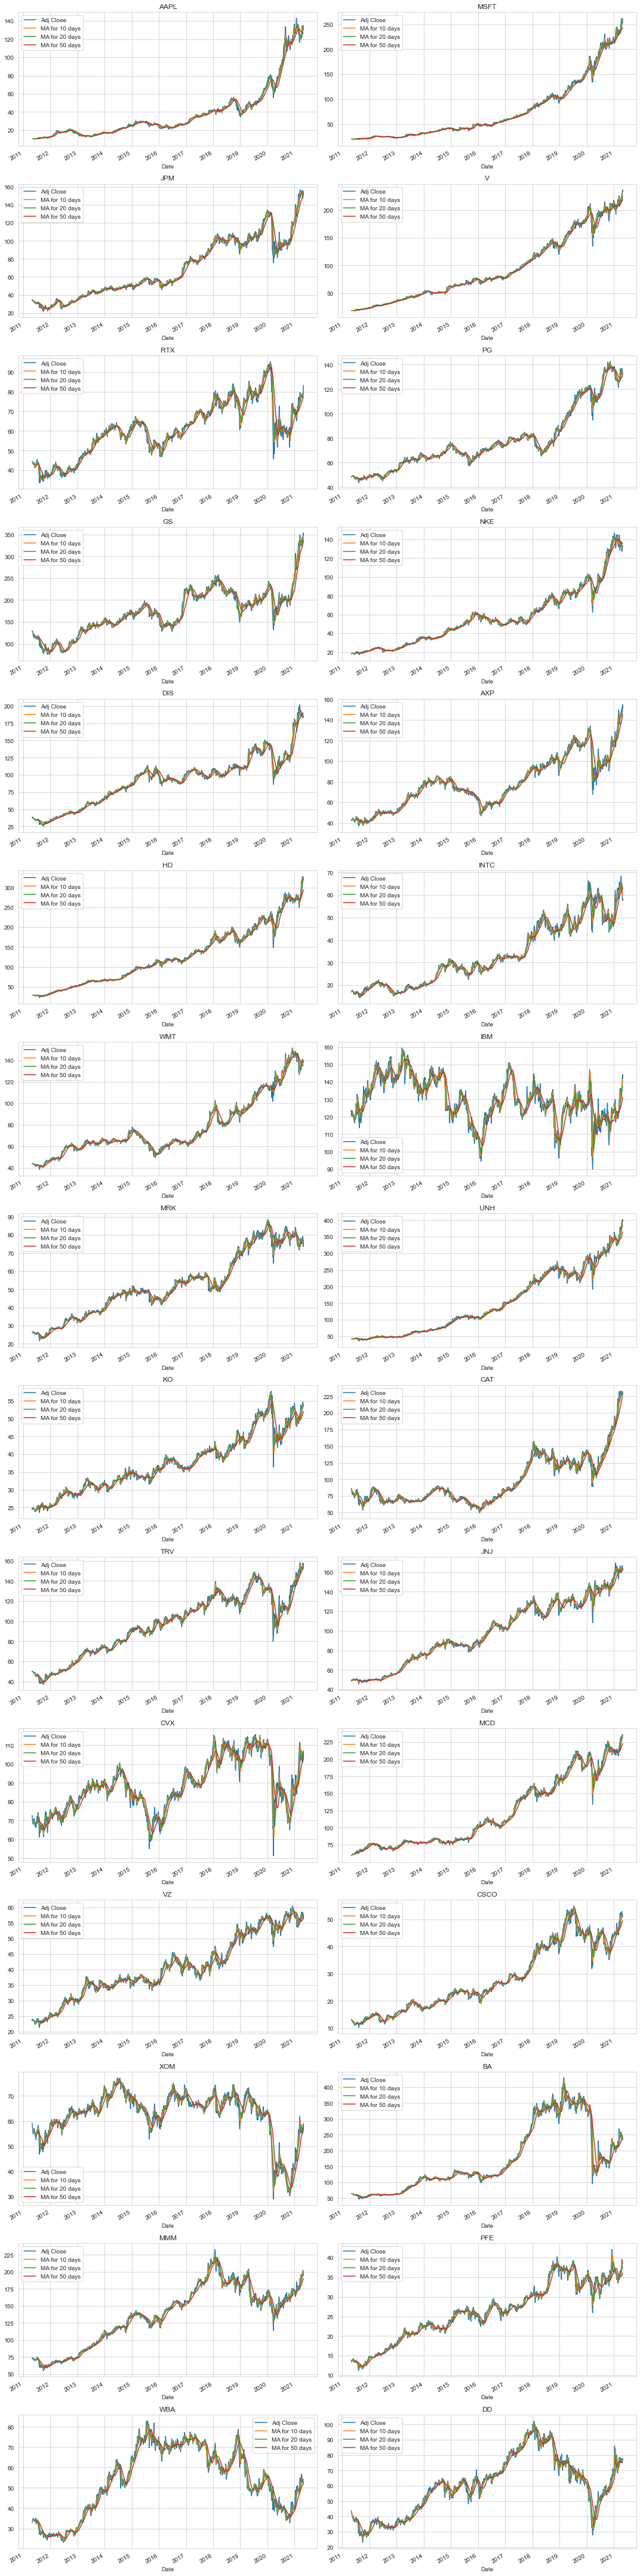

In [36]:
fig, axes = plt.subplots(nrows=nrows, ncols=2)
fig.set_figheight(4 * nrows)
fig.set_figwidth(15)

if len(tickers)>2:
    for i, ticker in enumerate(tickers):
        target_data[ticker][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[math.floor(i/2),i%2])
        axes[math.floor(i/2),i%2].set_title(ticker)
else:
    for i, ticker in enumerate(tickers):
        target_data[ticker][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i])
        axes[i].set_title(ticker)

fig.tight_layout()

# 3. Calculate the daily return for each stock in the data set

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

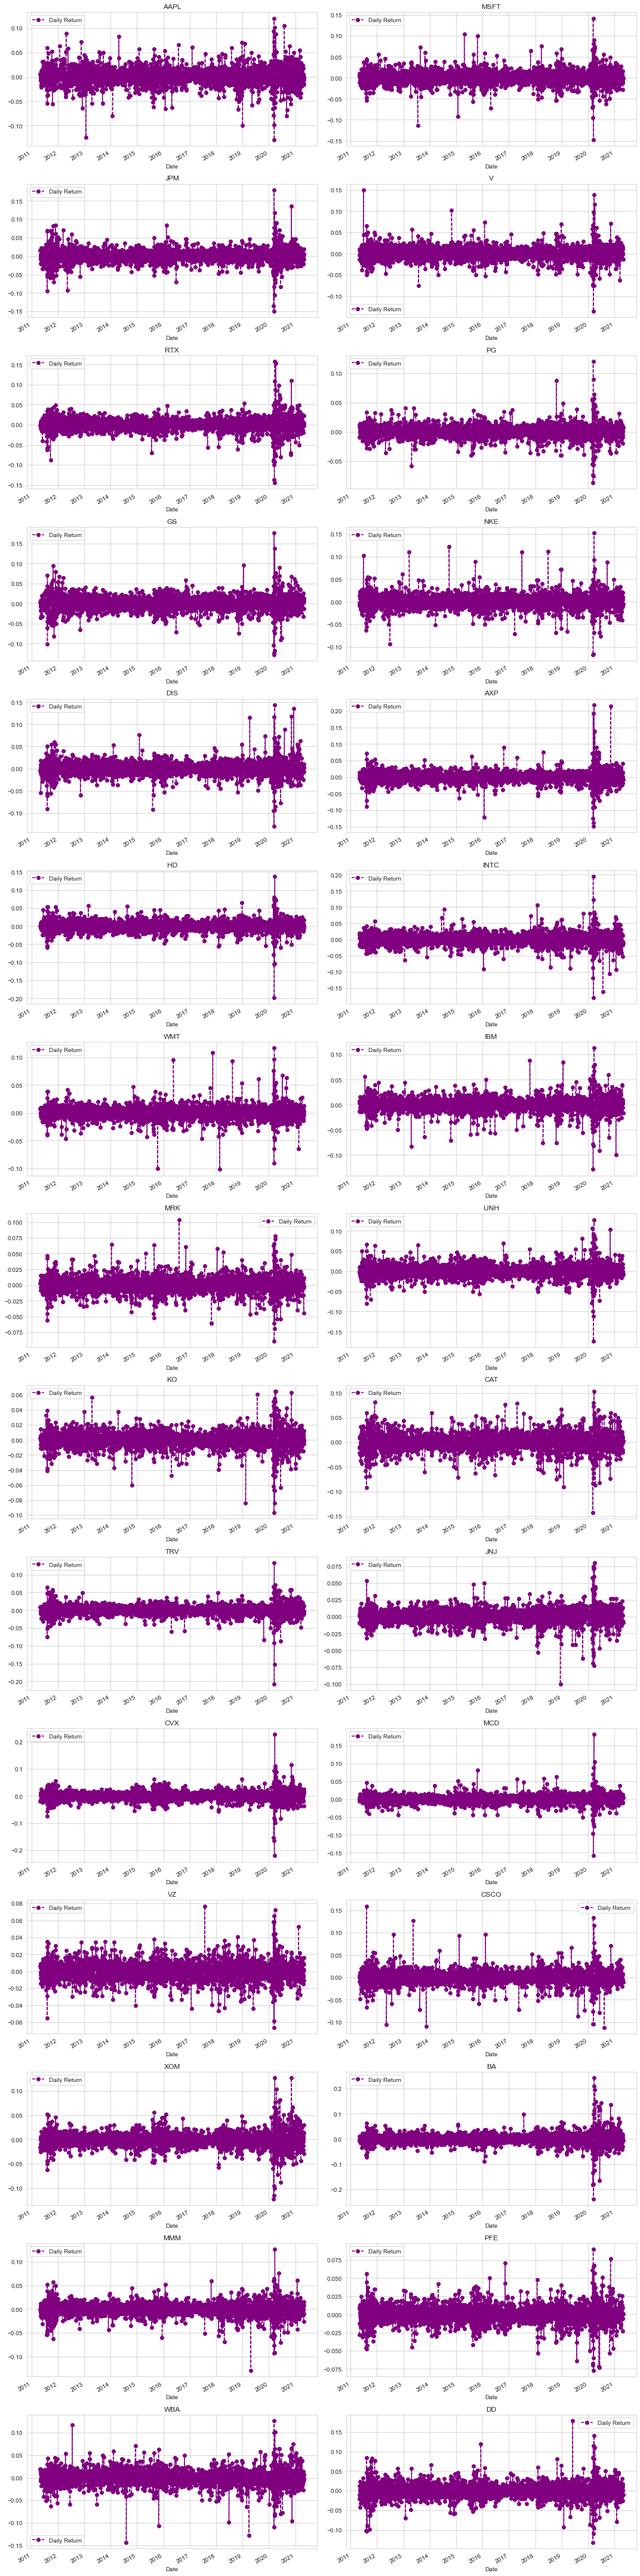

In [37]:
# We'll use pct_change to find the percent change for each day
for ticker in stock_index:
    stock_data[ticker]['Daily Return'] = stock_data[ticker]['Adj Close'].pct_change()

target_data = {}

for ticker in tickers:
    target_data[ticker] = stock_data[ticker].loc[start:end]       

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=nrows, ncols=2)
fig.set_figheight(4 * nrows)
fig.set_figwidth(15)

if len(tickers)>2:
    for i, ticker in enumerate(target_data):
        target_data[ticker]['Daily Return'].plot(ax=axes[math.floor(i/2),i%2], legend=True,color='purple', linestyle='--', marker='o')
        axes[math.floor(i/2),i%2].set_title(ticker)
else:
    for i, ticker in enumerate(target_data):
        target_data[ticker]['Daily Return'].plot(ax=axes[i], legend=True,color='purple', linestyle='--', marker='o')
        axes[i].set_title(ticker)

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

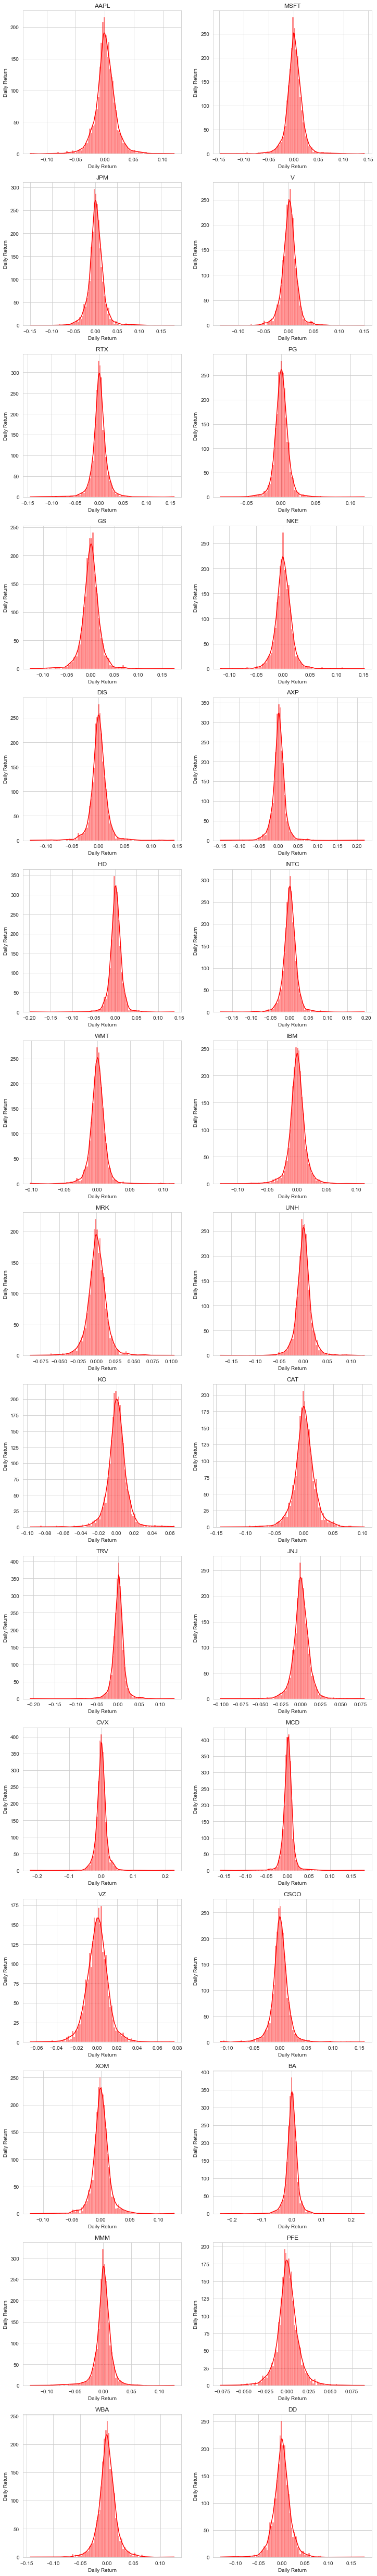

In [39]:
# dropna() is used here since NaN values can't be read by Seaborn
plt.figure(figsize=(12, 6*nrows))

for i, ticker in enumerate(target_data, 1):
    plt.subplot(nrows, 2, i)
    sns.histplot(data=target_data[ticker]['Daily Return'].dropna(),bins=100, kde=True,color='red')
    plt.ylabel('Daily Return')
    name = target_data[ticker].iloc[0]['Ticker']
    plt.title(f'{name}')

# 4. Determine correlations between different stock closing prices

In order to analyze the returns of our target data we will build a DataFrame with only the Adjusted Closing columns from each of the stock dataframes.

In [40]:
closing_df = DataReader(tickers, 'yahoo', start, end)['Adj Close']

closing_df

Symbols           AAPL        MSFT         JPM           V        RTX  \
Date                                                                    
2011-05-02   10.652606   20.474920   34.184052   18.421625  44.561378   
2011-05-03   10.711670   20.594608   34.743961   18.621809  44.487114   
2011-05-04   10.753815   20.794092   34.426182   18.568272  44.254391   
2011-05-05   10.667065   20.578650   34.176491   18.319201  43.833538   
2011-05-06   10.664294   20.642488   34.078133   18.484478  44.170227   
...                ...         ...         ...         ...        ...   
2021-04-26  134.720001  261.549988  150.559998  230.339996  81.000000   
2021-04-27  134.389999  261.970001  151.250000  229.910004  82.809998   
2021-04-28  133.580002  254.559998  152.229996  233.449997  83.080002   
2021-04-29  133.479996  252.509995  155.190002  236.860001  82.870003   
2021-04-30  131.460007  252.179993  153.809998  233.559998  83.239998   

Symbols             PG          GS         NKE         DIS         AXP  ...  \
Date                                                                    ...   
2011-05-02   48.011658  129.592880   18.225996   38.101688   42.844814  ...   
2011-05-03   48.402046  130.081116   18.097458   37.925591   43.060543  ...   
2011-05-04   48.961861  129.781342   18.347887   37.529331   42.887955  ...   
2011-05-05   48.527248  128.830551   18.307993   37.590969   42.732628  ...   
2011-05-06   48.077942  128.565048   18.177238   37.916775   43.319427  ...   
...                ...         ...         ...         ...         ...  ...   
2021-04-26  131.259995  343.519989  131.600006  184.270004  150.339996  ...   
2021-04-27  131.179993  346.630005  132.110001  184.639999  150.360001  ...   
2021-04-28  131.399994  348.109985  130.710007  183.389999  152.539993  ...   
2021-04-29  132.509995  352.970001  133.259995  185.330002  154.630005  ...   
2021-04-30  133.419998  348.450012  132.619995  186.020004  153.350006  ...   

Symbols            CVX         MCD         VZ       CSCO        XOM  \
Date                                                                  
2011-05-02   72.672417   58.923733  23.870726  13.099022  59.180183   
2011-05-03   71.322136   59.148506  24.023262  12.972351  58.261574   
2011-05-04   70.321190   59.245911  23.940636  13.017057  57.710381   
2011-05-05   68.937355   58.893768  23.591093  13.024511  56.220161   
2011-05-06   69.112007   58.968674  23.692783  13.084121  56.267803   
...                ...         ...        ...        ...        ...   
2021-04-26  101.519997  232.309998  56.939999  51.639999  55.680000   
2021-04-27  102.699997  234.979996  56.320000  51.369999  56.410000   
2021-04-28  105.220001  232.410004  56.430000  51.110001  58.110001   
2021-04-29  106.900002  235.210007  57.320000  51.459999  58.939999   
2021-04-30  103.070000  236.080002  57.790001  50.910000  57.240002   

Symbols             BA         MMM        PFE        WBA         DD  
Date                                                                 
2011-05-02   63.890682   73.826546  13.810413  32.889774  43.757763  
2011-05-03   63.874603   73.757973  13.429348  33.519409  42.879227  
2011-05-04   63.336334   73.278107  13.560749  33.255104  41.958336  
2011-05-05   63.023037   72.303101  13.396499  33.037457  41.524364  
2011-05-06   63.713924   72.821068  13.501620  32.913071  42.043011  
...                ...         ...        ...        ...        ...  
2021-04-26  241.440002  199.630005  38.680000  52.730000  76.930000  
2021-04-27  242.470001  194.449997  38.450001  52.509998  77.080002  
2021-04-28  235.460007  195.929993  38.810001  52.400002  77.050003  
2021-04-29  235.940002  199.050003  38.599998  52.740002  77.919998  
2021-04-30  234.309998  197.139999  38.650002  53.099998  77.110001  

[2517 rows x 30 columns]

Now that we have all the closing prices in one dataframe, we can calculate the daily return for all the stocks.

In [41]:
target_returns = closing_df.pct_change()

target_returns

Symbols         AAPL      MSFT       JPM         V       RTX        PG  \
Date                                                                     
2011-05-02       NaN       NaN       NaN       NaN       NaN       NaN   
2011-05-03  0.005545  0.005846  0.016379  0.010867 -0.001667  0.008131   
2011-05-04  0.003934  0.009686 -0.009146 -0.002875 -0.005231  0.011566   
2011-05-05 -0.008067 -0.010361 -0.007253 -0.013414 -0.009510 -0.008877   
2011-05-06 -0.000260  0.003102 -0.002878  0.009022  0.007681 -0.009259   
...              ...       ...       ...       ...       ...       ...   
2021-04-26  0.002978  0.001532  0.002464  0.001478  0.005711 -0.020009   
2021-04-27 -0.002450  0.001606  0.004583 -0.001867  0.022346 -0.000609   
2021-04-28 -0.006027 -0.028286  0.006479  0.015397  0.003261  0.001677   
2021-04-29 -0.000749 -0.008053  0.019444  0.014607 -0.002528  0.008447   
2021-04-30 -0.015133 -0.001307 -0.008892 -0.013932  0.004465  0.006867   

Symbols           GS       NKE       DIS       AXP  ...       CVX       MCD  \
Date                                                ...                       
2011-05-02       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2011-05-03  0.003767 -0.007052 -0.004622  0.005035  ... -0.018580  0.003815   
2011-05-04 -0.002305  0.013838 -0.010448 -0.004008  ... -0.014034  0.001647   
2011-05-05 -0.007326 -0.002174  0.001642 -0.003622  ... -0.019679 -0.005944   
2011-05-06 -0.002061 -0.007142  0.008667  0.013732  ...  0.002533  0.001272   
...              ...       ...       ...       ...  ...       ...       ...   
2021-04-26  0.012288  0.010830  0.006830  0.041641  ... -0.000295 -0.009677   
2021-04-27  0.009053  0.003875  0.002008  0.000133  ...  0.011623  0.011493   
2021-04-28  0.004270 -0.010597 -0.006770  0.014498  ...  0.024538 -0.010937   
2021-04-29  0.013961  0.019509  0.010579  0.013701  ...  0.015967  0.012048   
2021-04-30 -0.012806 -0.004803  0.003723 -0.008278  ... -0.035828  0.003699   

Symbols           VZ      CSCO       XOM        BA       MMM       PFE  \
Date                                                                     
2011-05-02       NaN       NaN       NaN       NaN       NaN       NaN   
2011-05-03  0.006390 -0.009670 -0.015522 -0.000252 -0.000929 -0.027593   
2011-05-04 -0.003439  0.003446 -0.009461 -0.008427 -0.006506  0.009785   
2011-05-05 -0.014600  0.000573 -0.025822 -0.004947 -0.013306 -0.012112   
2011-05-06  0.004311  0.004577  0.000847  0.010962  0.007164  0.007847   
...              ...       ...       ...       ...       ...       ...   
2021-04-26 -0.006283 -0.005201  0.001979  0.012837 -0.012710  0.000517   
2021-04-27 -0.010889 -0.005229  0.013111  0.004266 -0.025948 -0.005946   
2021-04-28  0.001953 -0.005061  0.030137 -0.028911  0.007611  0.009363   
2021-04-29  0.015772  0.006848  0.014283  0.002039  0.015924 -0.005411   
2021-04-30  0.008200 -0.010688 -0.028843 -0.006909 -0.009596  0.001295   

Symbols          WBA        DD  
Date                            
2011-05-02       NaN       NaN  
2011-05-03  0.019144 -0.020077  
2011-05-04 -0.007885 -0.021476  
2011-05-05 -0.006545 -0.010343  
2011-05-06 -0.003765  0.012490  
...              ...       ...  
2021-04-26 -0.005470  0.001562  
2021-04-27 -0.004172  0.001950  
2021-04-28 -0.002095 -0.000389  
2021-04-29  0.006489  0.011291  
2021-04-30  0.006826 -0.010395  

[2517 rows x 30 columns]

Now we can compare the daily percentage return of two stocks to check how correlated they are. As you can see comparing a stock to itself should give you a perfectly linear relationship.

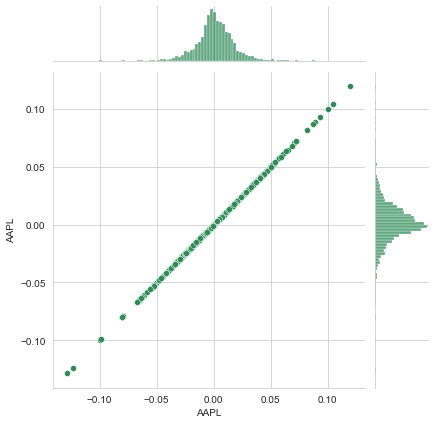

In [20]:
sns.jointplot(data=target_returns, x=tickers[0], y=tickers[0], kind='scatter', color='seagreen')

Select from the following tickers: ['AAPL', 'JPM', 'V']
Ticker X:JPM
Ticker Y:V


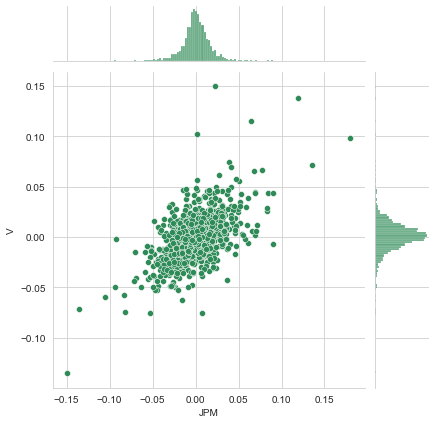

In [21]:
#Compare the daily percentage return of two stocks from the target data
x = input(f"Select from the following tickers: {tickers}\nTicker X:")

while x not in tickers:
    x = input("Ticker X:")
    
y = input("Ticker Y:")

while y not in tickers:
    y = input("Ticker Y:")
    
sns.jointplot(data=target_returns, x=x, y=y, kind='scatter', color='seagreen')

Now we have a better visualization of when stocks have a perfect positive correlation compared to a more realistic scenario where they have a less linear relationship bewteen the daily return values. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our target stock ticker list. We can use sns.pairplot() to automatically create this plot. The diagonal displays the histogram of a stock's returns normalized on a scale from [-1,1].

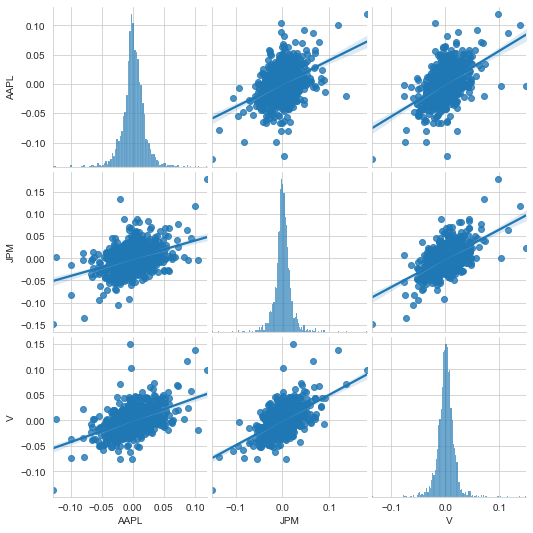

In [22]:
sns.pairplot(target_returns, kind='reg')

Above we can see all the relationships on daily returns between all the stocks in our target dataset. By using this data you can find correlations between different stocks. Next we will make use of sns.PairGrid() to provide further visualizations of this data.

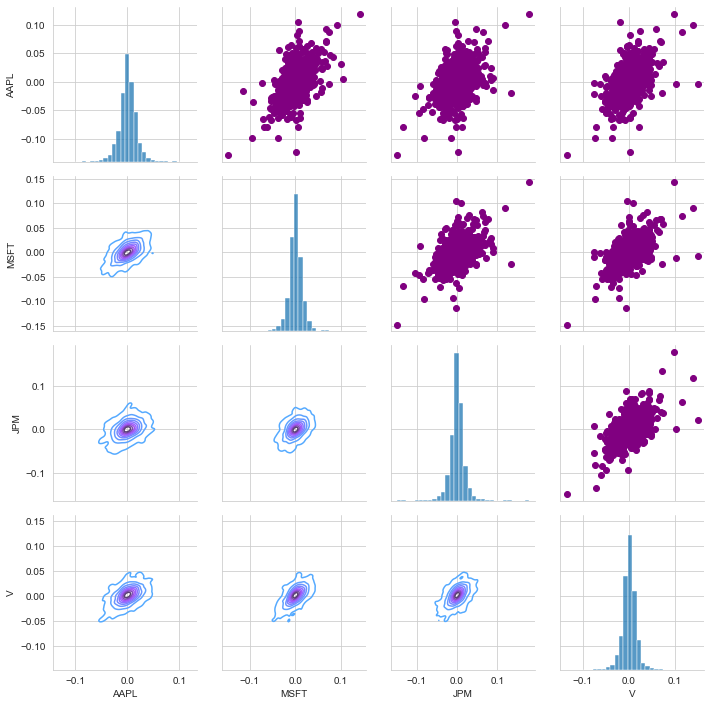

In [34]:
# Using dropna() for Seaborn
return_fig = sns.PairGrid(target_returns.dropna())

# Using map_upper we can specify what the upper triangle portion of the matrix will look like in our figure.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle of the matrix in the figure, including the plot type (kdeplot) 
# or the color map (cmap)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# The diagonal will be a series of histogram plots of the daily return
return_fig.map_diag(sns.histplot, bins=30)

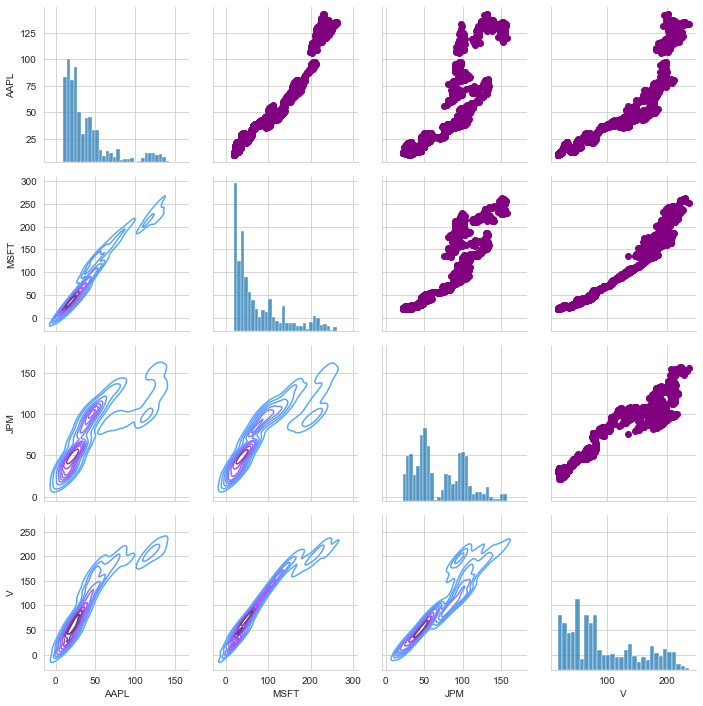

In [35]:
# Repeat for the closing prices
return_fig = sns.PairGrid(closing_df.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(sns.histplot, bins=30)

We can also do a correlation plot to get the actual numerical values for the correlation between the stocks' daily return values as well as the closing values from our dataframe of closing values.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

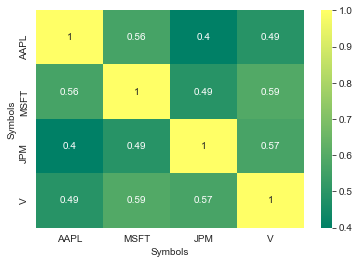

In [36]:
sns.heatmap(target_returns.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

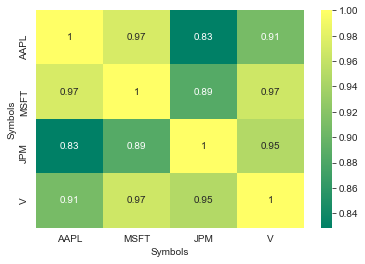

In [37]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Through the visualization of all this data as well as the numerical outputs, one can determine relationships between stocks and potentially use this information during training of a machine learning algorithm or even as metrics for the users to consider.

# 5. Visualize risk against expected return for investing in a particular stock

There are many ways we can quantify risk, however one of the easiest ways utilizes the information we've already gathered on daily percentage returns. It takes this data and compares it to the expected return with the standard deviation of the daily returns.

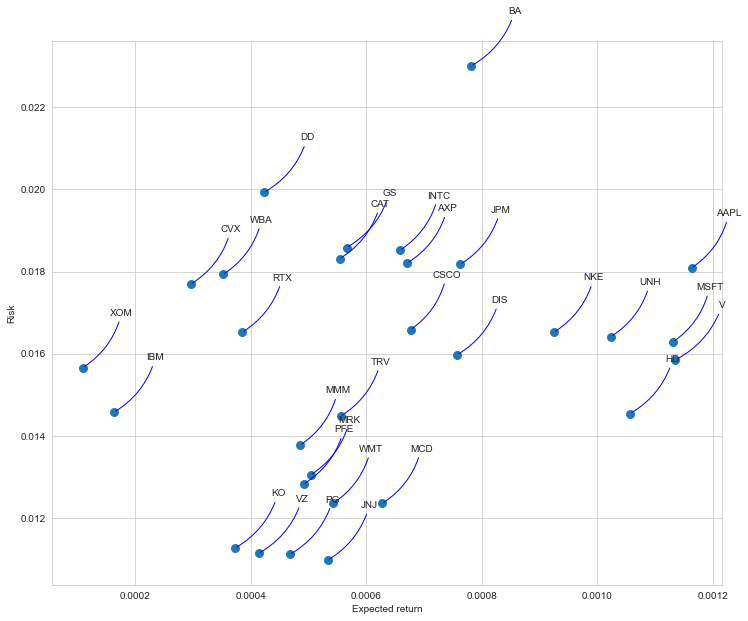

In [42]:
# Let's start by defining a new DataFrame as a clenaed version of the original traget_data Dataframe.
rets = target_returns.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.2'))

# 6. Predicting the closing stock price for a selected stock

We again begin by importing all of the tools and libraries we will need

In [42]:
from finrl.config import config
from finrl.marketdata.yahoodownloader import YahooDownloader
from finrl.preprocessing.preprocessors import FeatureEngineer
from finrl.preprocessing.data import data_split

from finrl.model.models import DRLAgent
from finrl.trade.backtest import backtest_stats, backtest_plot, get_daily_return, get_baseline,convert_daily_return_to_pyfolio_ts

import sys
sys.path.append("../Portfolio-Pal")

# Create folders for storing results and models
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

The FinRL library utilizes a specific type of formatting so we will reload our data from above using the same data range, but making use of their custom YahooDownloader method that uses the same Yahoo Finance API information as above.

In [43]:
data = {}

yd = YahooDownloader(start_date = start, end_date = end, ticker_list = stock_index)
df = yd.fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In order to train our models we must first preprocess our data. This ensures that our machine learning model will be able to train efficiently and effectively. Most importantly we would like to add some extra features on to our dataset so that we can have extra indicators for when to buy, sell or hold. Metrics such as MACD and RSI are also used in practical stock trading which makes sense since humans need more than just the price movement to make decisions and so should our AI. Additionally, we will need to create a covariance matrix to represent our state space.

In [44]:
# Perform Feature Engineering:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    use_turbulence=False,
                    user_defined_feature = False)

df = fe.preprocess_data(df)

# add covariance matrix as states
df = df.sort_values(['date','tic'],ignore_index=True)
df.index = df.date.factorize()[0]

cov_list = []
# look back is one year which is 252 trading days
lookback=252
for i in range(lookback,len(df.index.unique())):
    data_lookback = df.loc[i-lookback:i,:]
    price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
    return_lookback = price_lookback.pct_change().dropna()
    covs = return_lookback.cov().values
    cov_list.append(covs)

df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list})
df = df.merge(df_cov, on='date')
df = df.sort_values(['date','tic']).reset_index(drop=True)
df.head()

Successfully added technical indicators


date        open        high         low      close     volume   tic  \
0  2012-04-30   21.350000   21.371429   20.821428  17.964962  506144800  AAPL   
1  2012-04-30   60.049999   60.310001   59.750000  52.740185    7902500   AXP   
2  2012-04-30   76.510002   76.870003   75.680000  63.212051    5811100    BA   
3  2012-04-30  103.989998  104.120003  102.550003  79.143837    5325600   CAT   
4  2012-04-30   19.850000   20.170000   19.820000  15.246208   36405500  CSCO   

   day      macd    boll_ub    boll_lb     rsi_30      cci_30      dx_30  \
0    0  0.049349  20.040832  17.244085  53.843852  -84.822829   6.193377   
1    0  0.814030  52.624523  48.999962  63.643402  225.232175  37.169031   
2    0  0.491071  63.918713  57.866553  56.694180  137.259813  12.433509   
3    0 -0.659242  84.799205  77.557644  45.860701 -111.359006  30.656848   
4    0 -0.080317  15.754141  14.494004  52.722353  -29.463407   5.801339   

   close_30_sma  close_60_sma  \
0     18.635701     17.363314   
1     50.677321     48.497593   
2     61.067950     61.380743   
3     81.760773     84.202634   
4     15.284475     15.178801   

                                            cov_list  
0  [[0.00034022264905674145, 0.000190524366845037...  
1  [[0.00034022264905674145, 0.000190524366845037...  
2  [[0.00034022264905674145, 0.000190524366845037...  
3  [[0.00034022264905674145, 0.000190524366845037...  
4  [[0.00034022264905674145, 0.000190524366845037...

# Model Training

In [45]:
train = data_split(df, start, end)

stock_dimension = len(train.tic.unique())
state_space = stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 30


### Environment for Portfolio Allocation

In [61]:
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
from stable_baselines3.common.vec_env import DummyVecEnv


class Environment(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, 
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                turbulence_threshold=None,
                lookback=252,
                day = 0):

        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list

        self.action_space = spaces.Box(low = 0, high = 1,shape = (self.action_space,)) 
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape = (self.state_space+len(self.tech_indicator_list),self.state_space))

        # load data
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.terminal = False     
        self.turbulence_threshold = turbulence_threshold        
        # initalize state
        self.portfolio_value = self.initial_amount

        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]]

        
    def step(self, actions):
        self.terminal = self.day >= len(self.df.index.unique())-1

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()
            
            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))           
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe: ",sharpe)
            print("=================================")
            
            return self.state, self.reward, self.terminal,{}

        else:
            weights = self.softmax_normalization(actions) 
            self.actions_memory.append(weights)
            last_day_memory = self.data

            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.covs = self.data['cov_list'].values[0]
            self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights)
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            self.portfolio_value = new_portfolio_value

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])            
            self.asset_memory.append(new_portfolio_value)

            # the reward is the new portfolio value or end portfolo value
            self.reward = new_portfolio_value 
        
        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.portfolio_value = self.initial_amount
        self.terminal = False 
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]] 
        return self.state
    
    def render(self, mode='human'):
        return self.state
        
    def softmax_normalization(self, actions):
        numerator = np.exp(actions)
        denominator = np.sum(np.exp(actions))
        softmax_output = numerator/denominator
        return softmax_output

    
    def save_asset_memory(self):
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']
        
        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        df_actions.columns = self.data.tic.values
        df_actions.index = df_date.date
        return df_actions

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

In [48]:
env_kwargs = {
    "hmax": 1000, 
    "initial_amount": 1000, 
    "transaction_cost_pct": 0.01, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": config.TECHNICAL_INDICATORS_LIST, 
    "action_space": stock_dimension, 
    "reward_scaling": 1e-3
    
}

e_train_gym = Environment(df = train, **env_kwargs)

In [49]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


### Implement DRL Algorithms

### Model 1: **A2C**


In [50]:
agent = DRLAgent(env = env_train)

A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.005, "learning_rate": 0.0002}
model_a2c = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cpu device


In [51]:
trained_a2c = agent.train_model(model=model_a2c, 
                                tb_log_name='a2c',
                                total_timesteps=60000)

Logging to tensorboard_log/a2c\a2c_1
-------------------------------------
| time/                 |           |
|    fps                | 468       |
|    iterations         | 100       |
|    time_elapsed       | 1         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -42.5     |
|    explained_variance | -6.21e-05 |
|    learning_rate      | 0.0002    |
|    n_updates          | 99        |
|    policy_loss        | 1.63e+05  |
|    std                | 0.998     |
|    value_loss         | 2.05e+07  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 477      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -42.5    |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0002   |
|    n_updates         

-------------------------------------
| time/                 |           |
|    fps                | 466       |
|    iterations         | 1500      |
|    time_elapsed       | 16        |
|    total_timesteps    | 7500      |
| train/                |           |
|    entropy_loss       | -42.4     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0002    |
|    n_updates          | 1499      |
|    policy_loss        | 2.17e+05  |
|    std                | 0.994     |
|    value_loss         | 2.69e+07  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 467      |
|    iterations         | 1600     |
|    time_elapsed       | 17       |
|    total_timesteps    | 8000     |
| train/                |          |
|    entropy_loss       | -42.4    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 1599     |
|    policy_loss       

------------------------------------
| time/                 |          |
|    fps                | 465      |
|    iterations         | 2900     |
|    time_elapsed       | 31       |
|    total_timesteps    | 14500    |
| train/                |          |
|    entropy_loss       | -42.2    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0002   |
|    n_updates          | 2899     |
|    policy_loss        | 2.02e+05 |
|    std                | 0.989    |
|    value_loss         | 2.81e+07 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 465      |
|    iterations         | 3000     |
|    time_elapsed       | 32       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -42.2    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 2999     |
|    policy_loss        | 2.84e+05 |
|

------------------------------------
| time/                 |          |
|    fps                | 468      |
|    iterations         | 4300     |
|    time_elapsed       | 45       |
|    total_timesteps    | 21500    |
| train/                |          |
|    entropy_loss       | -42.1    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 4299     |
|    policy_loss        | 2.19e+05 |
|    std                | 0.985    |
|    value_loss         | 3.34e+07 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 469      |
|    iterations         | 4400     |
|    time_elapsed       | 46       |
|    total_timesteps    | 22000    |
| train/                |          |
|    entropy_loss       | -42.1    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 4399     |
|    policy_loss        | 3.12e+05 |
|

------------------------------------
| time/                 |          |
|    fps                | 466      |
|    iterations         | 5700     |
|    time_elapsed       | 61       |
|    total_timesteps    | 28500    |
| train/                |          |
|    entropy_loss       | -41.9    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 5699     |
|    policy_loss        | 2.47e+05 |
|    std                | 0.978    |
|    value_loss         | 4.9e+07  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 467      |
|    iterations         | 5800     |
|    time_elapsed       | 62       |
|    total_timesteps    | 29000    |
| train/                |          |
|    entropy_loss       | -41.9    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 5799     |
|    policy_loss        | 3.7e+05  |
|

------------------------------------
| time/                 |          |
|    fps                | 467      |
|    iterations         | 7100     |
|    time_elapsed       | 76       |
|    total_timesteps    | 35500    |
| train/                |          |
|    entropy_loss       | -41.7    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 7099     |
|    policy_loss        | 2.85e+05 |
|    std                | 0.973    |
|    value_loss         | 5.87e+07 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 467      |
|    iterations         | 7200     |
|    time_elapsed       | 77       |
|    total_timesteps    | 36000    |
| train/                |          |
|    entropy_loss       | -41.7    |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0002   |
|    n_updates          | 7199     |
|    policy_loss        | 3.39e+05 |
|

------------------------------------
| time/                 |          |
|    fps                | 466      |
|    iterations         | 8500     |
|    time_elapsed       | 91       |
|    total_timesteps    | 42500    |
| train/                |          |
|    entropy_loss       | -41.6    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 8499     |
|    policy_loss        | 2.95e+05 |
|    std                | 0.968    |
|    value_loss         | 6.94e+07 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 466      |
|    iterations         | 8600     |
|    time_elapsed       | 92       |
|    total_timesteps    | 43000    |
| train/                |          |
|    entropy_loss       | -41.6    |
|    explained_variance | 2.98e-07 |
|    learning_rate      | 0.0002   |
|    n_updates          | 8599     |
|    policy_loss        | 3.97e+05 |
|

------------------------------------
| time/                 |          |
|    fps                | 466      |
|    iterations         | 9900     |
|    time_elapsed       | 106      |
|    total_timesteps    | 49500    |
| train/                |          |
|    entropy_loss       | -41.5    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 9899     |
|    policy_loss        | 3.33e+05 |
|    std                | 0.964    |
|    value_loss         | 9.02e+07 |
------------------------------------
begin_total_asset:1000
end_total_asset:3496.539874257318
Sharpe:  0.9024650653467027
------------------------------------
| time/                 |          |
|    fps                | 466      |
|    iterations         | 10000    |
|    time_elapsed       | 107      |
|    total_timesteps    | 50000    |
| train/                |          |
|    entropy_loss       | -41.5    |
|    explained_variance | 3.58e-07 |
|    learning_rate      | 0

------------------------------------
| time/                 |          |
|    fps                | 465      |
|    iterations         | 11300    |
|    time_elapsed       | 121      |
|    total_timesteps    | 56500    |
| train/                |          |
|    entropy_loss       | -41.3    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 11299    |
|    policy_loss        | 3.77e+05 |
|    std                | 0.96     |
|    value_loss         | 9.4e+07  |
------------------------------------
begin_total_asset:1000
end_total_asset:3526.5562858179164
Sharpe:  0.9157764076375737
------------------------------------
| time/                 |          |
|    fps                | 465      |
|    iterations         | 11400    |
|    time_elapsed       | 122      |
|    total_timesteps    | 57000    |
| train/                |          |
|    entropy_loss       | -41.3    |
|    explained_variance | 0        |
|    learning_rate      | 

### Model 2: **PPO**


In [52]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.0001,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device


In [53]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=80000)

Logging to tensorboard_log/ppo\ppo_1
-----------------------------
| time/              |      |
|    fps             | 715  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
begin_total_asset:1000
end_total_asset:3730.0670675669908
Sharpe:  0.9457354139128856
--------------------------------------------
| time/                   |                |
|    fps                  | 625            |
|    iterations           | 2              |
|    time_elapsed         | 6              |
|    total_timesteps      | 4096           |
| train/                  |                |
|    approx_kl            | 0.000112142414 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -42.6          |
|    explained_variance   | 3.11e-05       |
|    learning_rate        | 0.0001         |
|    loss                 | 5.51e+08       |
|    n_updates            | 10       

begin_total_asset:1000
end_total_asset:3825.3981080159133
Sharpe:  0.9730299442498854
-------------------------------------------
| time/                   |               |
|    fps                  | 589           |
|    iterations           | 10            |
|    time_elapsed         | 34            |
|    total_timesteps      | 20480         |
| train/                  |               |
|    approx_kl            | -0.0001912769 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -42.6         |
|    explained_variance   | 2.38e-07      |
|    learning_rate        | 0.0001        |
|    loss                 | 6.12e+08      |
|    n_updates            | 90            |
|    policy_gradient_loss | -0.000735     |
|    std                  | 1             |
|    value_loss           | 1.28e+09      |
-------------------------------------------
--------------------------------------------
| time/                   |      

begin_total_asset:1000
end_total_asset:3532.512985635083
Sharpe:  0.9107499004128303
-------------------------------------------
| time/                   |               |
|    fps                  | 585           |
|    iterations           | 19            |
|    time_elapsed         | 66            |
|    total_timesteps      | 38912         |
| train/                  |               |
|    approx_kl            | 3.9549544e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -42.6         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0001        |
|    loss                 | 7.38e+08      |
|    n_updates            | 180           |
|    policy_gradient_loss | -0.000594     |
|    std                  | 1             |
|    value_loss           | 1.36e+09      |
-------------------------------------------
begin_total_asset:1000
end_total_asset:3548.4589188946784
Sharpe:  0.9175803434

begin_total_asset:1000
end_total_asset:3803.559484910398
Sharpe:  0.9665296447596416
-------------------------------------------
| time/                   |               |
|    fps                  | 582           |
|    iterations           | 28            |
|    time_elapsed         | 98            |
|    total_timesteps      | 57344         |
| train/                  |               |
|    approx_kl            | 0.00012357906 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -42.6         |
|    explained_variance   | 1.79e-07      |
|    learning_rate        | 0.0001        |
|    loss                 | 6.17e+08      |
|    n_updates            | 270           |
|    policy_gradient_loss | -0.000563     |
|    std                  | 1             |
|    value_loss           | 1.15e+09      |
-------------------------------------------
begin_total_asset:1000
end_total_asset:3739.1076711070596
Sharpe:  0.9544183457

begin_total_asset:1000
end_total_asset:3313.1374696236403
Sharpe:  0.8735655539219458
-------------------------------------------
| time/                   |               |
|    fps                  | 582           |
|    iterations           | 37            |
|    time_elapsed         | 130           |
|    total_timesteps      | 75776         |
| train/                  |               |
|    approx_kl            | 9.7243115e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -42.6         |
|    explained_variance   | 1.79e-07      |
|    learning_rate        | 0.0001        |
|    loss                 | 5.2e+08       |
|    n_updates            | 360           |
|    policy_gradient_loss | -0.000643     |
|    std                  | 1             |
|    value_loss           | 1.16e+09      |
-------------------------------------------
begin_total_asset:1000
end_total_asset:3172.424121213647
Sharpe:  0.8409625365

### Model 3: **SAC**


In [54]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0003,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0003, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device


In [55]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=50000)

Logging to tensorboard_log/sac\sac_1
begin_total_asset:1000
end_total_asset:3890.3442476868995
Sharpe:  0.9527710273730565
begin_total_asset:1000
end_total_asset:4094.8866081224583
Sharpe:  0.9862887502956518
begin_total_asset:1000
end_total_asset:4096.4741550749
Sharpe:  0.9874341426840133
begin_total_asset:1000
end_total_asset:3906.7618661355077
Sharpe:  0.9504869753785222
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 43       |
|    time_elapsed    | 208      |
|    total timesteps | 9056     |
| train/             |          |
|    actor_loss      | -7.4e+04 |
|    critic_loss     | 1.26e+06 |
|    ent_coef        | 0.565    |
|    ent_coef_loss   | 1.62     |
|    learning_rate   | 0.0003   |
|    n_updates       | 8955     |
---------------------------------
begin_total_asset:1000
end_total_asset:3925.3889012486716
Sharpe:  0.957530313699948
begin_total_asset:1000
end_total_asset:3870.40584189854
Sharp

### Model 4: TD3

In [56]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 128, "buffer_size": 50000, "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device


In [57]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=50000)

Logging to tensorboard_log/td3\td3_1
begin_total_asset:1000
end_total_asset:3346.3498608329905
Sharpe:  0.8846531110405655
begin_total_asset:1000
end_total_asset:3490.725990804078
Sharpe:  0.9239151678650659
begin_total_asset:1000
end_total_asset:3490.725990804078
Sharpe:  0.9239151678650659
begin_total_asset:1000
end_total_asset:3490.725990804078
Sharpe:  0.9239151678650659
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 64        |
|    time_elapsed    | 139       |
|    total timesteps | 9056      |
| train/             |           |
|    actor_loss      | -2.47e+04 |
|    critic_loss     | 1.29e+05  |
|    learning_rate   | 0.001     |
|    n_updates       | 6792      |
----------------------------------
begin_total_asset:1000
end_total_asset:3490.725990804078
Sharpe:  0.9239151678650659
begin_total_asset:1000
end_total_asset:3490.725990804078
Sharpe:  0.9239151678650659
begin_total_asset:1000
end_total

## Trading Simulation
For this scenario we give our agent $1,000 initial capital starting from 2020-01-01 to present, however we can adjust this to any date desired. We can now choose one of our models to trade Dow jones 30 stocks in this scenario.

In [91]:
trade_start = '2020-01-01'
trade_end = end
trade = data_split(df,trade_start, trade_end)
e_trade_gym = Environment(df = trade, **env_kwargs)

In [92]:
trade.shape

(9990, 17)

In [93]:
models = ['A2C', 'PPO', 'SAC', 'TD3']

user_input =''

while user_input not in models:
    user_input = input(f"Choose a model {models}:")

    
if user_input == 'A2C':
    model=trained_a2c
elif user_input == 'PPO':
    model=trained_ppo
elif user_input == 'SAC':
    model=trained_sac
else:
    model=trained_td3
    
df_daily_return, df_actions = DRLAgent.DRL_prediction(model=model, environment = e_trade_gym)

Choose a model ['A2C', 'PPO', 'SAC', 'TD3']:PPO
begin_total_asset:1000
end_total_asset:1176.2530347950549
Sharpe:  0.5422331866668625
hit end!


In [95]:
df_daily_return.head()

date  daily_return
0  2020-01-02      0.000000
1  2020-01-03     -0.008025
2  2020-01-06      0.000969
3  2020-01-07     -0.005805
4  2020-01-08      0.002650

In [96]:
df_actions.head()

AAPL       AXP        BA       CAT      CSCO       CVX  \
date                                                                     
2020-01-02  0.033333  0.033333  0.033333  0.033333  0.033333  0.033333   
2020-01-03  0.053577  0.020260  0.055071  0.026520  0.055071  0.055071   
2020-01-06  0.022673  0.022673  0.022673  0.061631  0.022673  0.022673   
2020-01-07  0.022650  0.022650  0.050848  0.023991  0.022650  0.022650   
2020-01-08  0.021216  0.021216  0.021216  0.046476  0.057671  0.022972   

                  DD       DIS        GS        HD  ...       PFE        PG  \
date                                                ...                       
2020-01-02  0.033333  0.033333  0.033333  0.033333  ...  0.033333  0.033333   
2020-01-03  0.020260  0.020260  0.020260  0.020260  ...  0.055071  0.020260   
2020-01-06  0.022673  0.061631  0.022673  0.022673  ...  0.040874  0.022673   
2020-01-07  0.022650  0.022650  0.031038  0.022650  ...  0.031317  0.061570   
2020-01-08  0.021216  0.021216  0.021216  0.057671  ...  0.026099  0.050688   

                 RTX       TRV       UNH         V        VZ       WBA  \
date                                                                     
2020-01-02  0.033333  0.033333  0.033333  0.033333  0.033333  0.033333   
2020-01-03  0.026764  0.020260  0.036730  0.021642  0.023934  0.030667   
2020-01-06  0.060311  0.022673  0.022673  0.022673  0.038486  0.022673   
2020-01-07  0.028014  0.061570  0.022650  0.024989  0.022650  0.034369   
2020-01-08  0.021216  0.021216  0.021216  0.021216  0.048934  0.040787   

                 WMT       XOM  
date                            
2020-01-02  0.033333  0.033333  
2020-01-03  0.027496  0.020260  
2020-01-06  0.022673  0.036350  
2020-01-07  0.061570  0.022650  
2020-01-08  0.021216  0.021216  

[5 rows x 30 columns]

In [97]:
df_actions.to_csv('df_actions.csv')

#  7. Backtesting on Various models
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

### Backtesting Statitics
pass in df_account_value, this information is stored in env class


In [98]:
from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func( returns=DRL_strat, 
                              factor_returns=DRL_strat, 
                                positions=None, transactions=None, turnover_denom="AGB")

In [99]:
print("==============DRL Strategy Stats===========")
perf_stats_all

==============DRL Strategy Stats===========


Annual return          0.130712
Cumulative returns     0.176253
Annual volatility      0.322903
Sharpe ratio           0.542233
Calmar ratio           0.364105
Stability              0.517717
Max drawdown          -0.358995
Omega ratio            1.118437
Sortino ratio          0.765915
Skew                  -0.204935
Kurtosis               9.228706
Tail ratio             0.827448
Daily value at risk   -0.039987
Alpha                  0.000000
Beta                   1.000000
dtype: float64


### Backtesting Plotted Metrics

Current Index:['AAPL', 'MSFT', 'JPM', 'V', 'RTX', 'PG', 'GS', 'NKE', 'DIS', 'AXP', 'HD', 'INTC', 'WMT', 'IBM', 'MRK', 'UNH', 'KO', 'CAT', 'TRV', 'JNJ', 'CVX', 'MCD', 'VZ', 'CSCO', 'XOM', 'BA', 'MMM', 'PFE', 'WBA', 'DD']
Enter a stock ticker:AAPL
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (253, 8)


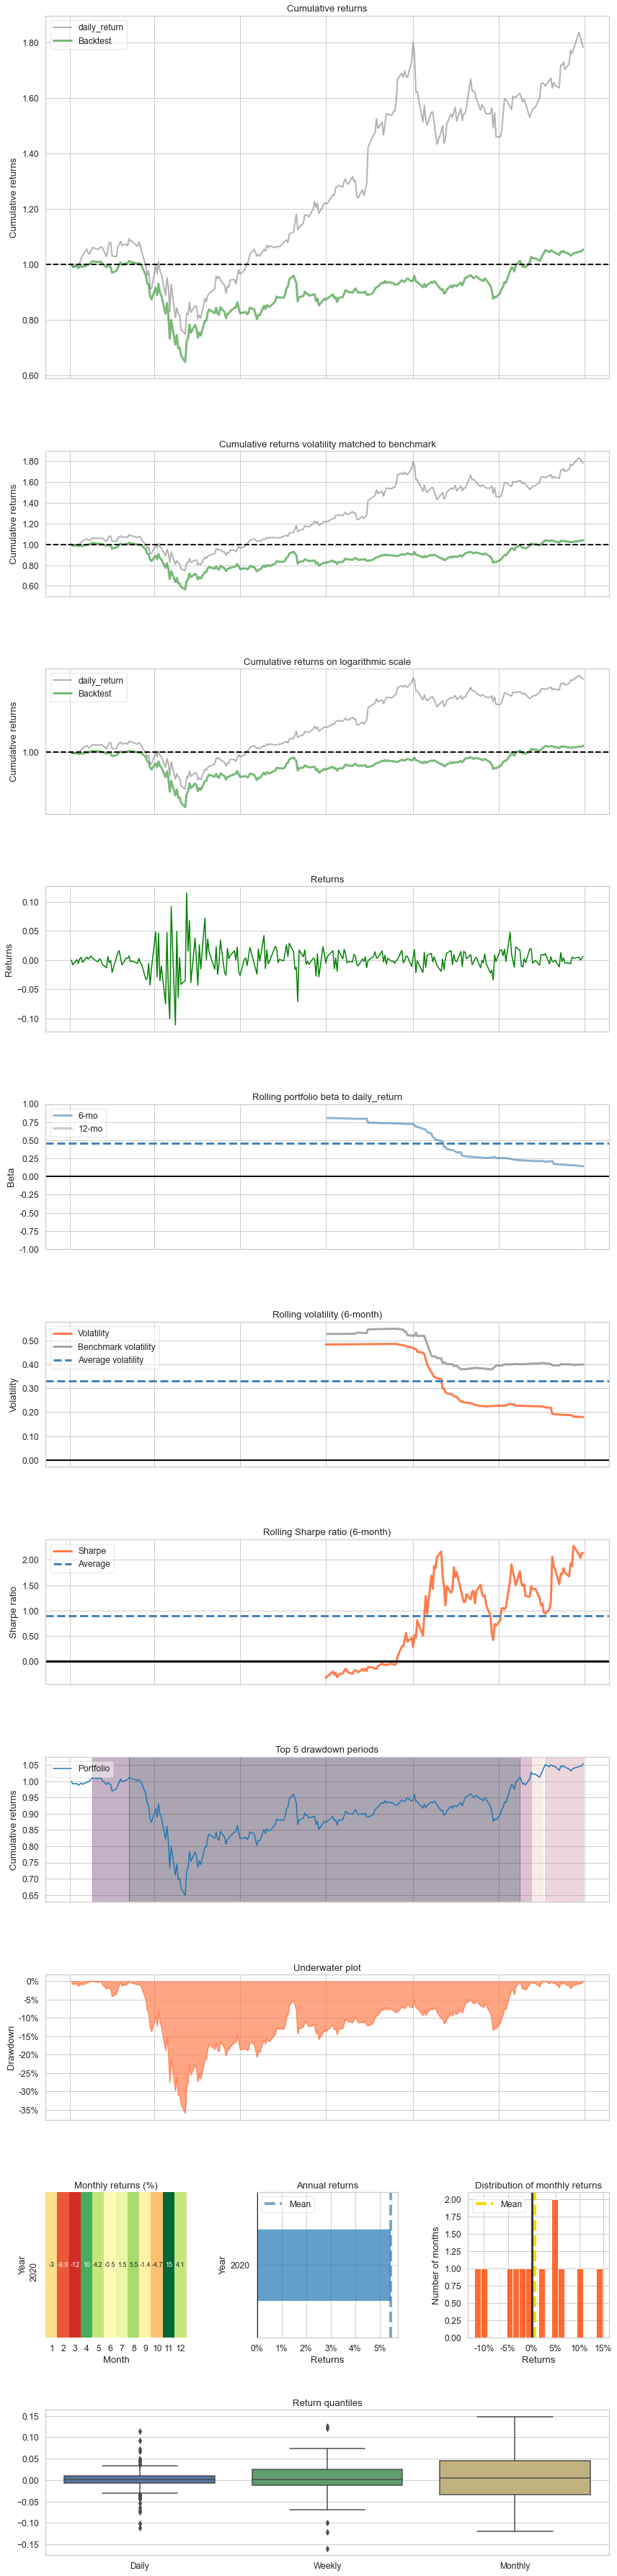

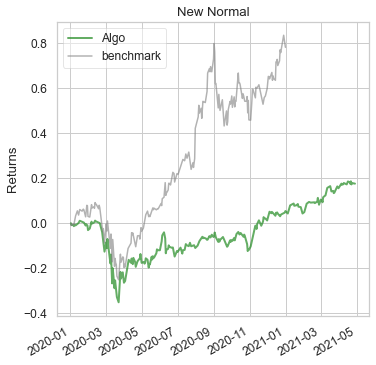

In [100]:
import pyfolio
%matplotlib inline

ticker = ''
print(f"Current Index:{stock_index}")
while ticker not in stock_index:
    ticker = input("Enter a stock ticker:") 

baseline_df = get_baseline(ticker=ticker, start=trade_start, end=trade_end)

baseline_returns = get_daily_return(baseline_df, value_col_name="close")

with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(returns = DRL_strat,
                                       benchmark_rets=baseline_returns, set_context=False)